In [44]:
from sklearn import datasets

In [45]:
diabetes=datasets.load_diabetes()

In [46]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [47]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
X = diabetes['data']
Y = diabetes['target']
x1 = X[:,3]
x2 = Y

In [50]:
c1 = [-0.07,150]; c2 = [0,150]; c3 = [0.07, 150]
cen = [[-0.07,0,0.07],[150,150,150]]

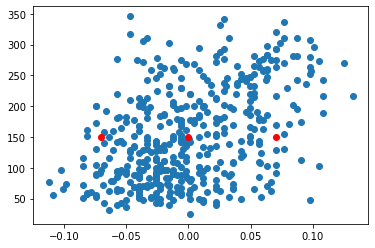

In [51]:
plt.scatter(x1,x2)
plt.plot(cen[0],cen[1], 'ro')

In [52]:
r1 = (x1-c1[0])**2+(x2-c1[1])**2
r2 = (x1-c2[0])**2+(x2-c2[1])**2
r3 = (x1-c3[0])**2+(x2-c3[1])**2

In [53]:
g = np.array([])
for i in range(len(r1)):
    g= np.append(g, np.argmin([r1[i],r2[i],r3[i]]))

In [54]:
n,a1,a2 = 0,0,0
for i in range(len(r1)):
    if (g[i]==0) :
        n=n+1
        a1 = a1 + x1[i]
        a2 = a2+x2[i]
a1/n,a2/n 

(-0.05656566631661796, 118.8125)

In [55]:
a=[]
for j in range(3) :
    a.append([np.mean([x1[i]for i in np.where(g==j)]), np.mean([x2[i] for i in np.where(g==j)])])

In [56]:
c1 = [a[0][0], a[0][1]]
c2 = [a[1][0], a[1][1]]
c3 = [a[2][0], a[2][1]]

In [57]:
c1 , c2 , c3

([-0.05656566631661797, 118.8125],
 [-0.00428609221811393, 144.11926605504587],
 [0.0649082386697331, 201.05357142857142])

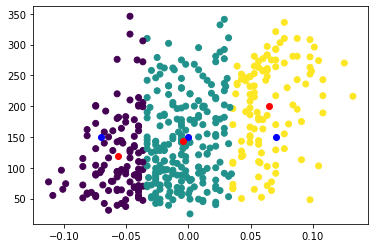

In [58]:
plt.scatter(x1,x2,c=g)
plt.plot(cen[0],cen[1], 'bo')
plt.plot([i[0] for i in a], [i[1] for i in a], 'ro')

In [59]:
from sklearn.cluster import KMeans

In [60]:
km = KMeans(n_clusters = 2)

X=[x1,x2]
data = np.transpose(X)

In [61]:
km.fit(data)

KMeans(n_clusters=2)

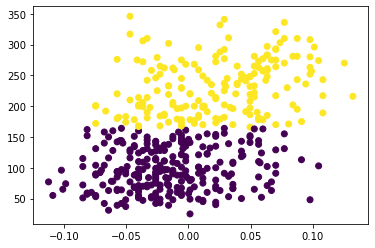

In [62]:
plt.scatter(x1,x2,c=km.labels_)

In [63]:
num_clusters = range(1,11)
inertias = []

In [64]:
for i in num_clusters:
    km = KMeans(n_clusters=i)
    km.fit(data)
    inertias.append(km.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


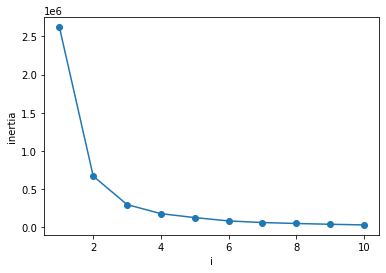

In [65]:
plt.xlabel('i')
plt.ylabel('inertia')
plt.plot(num_clusters, inertias, '-o')

In [66]:
km = KMeans(n_clusters = 3)

X=[x1,x2]
data = np.transpose(X)

In [67]:
km.fit(data)

KMeans(n_clusters=3)

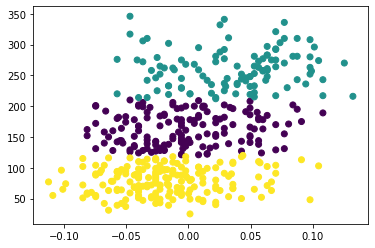

In [68]:
plt.scatter(x1,x2,c=km.labels_)